<a href="https://colab.research.google.com/github/Falconwatch/MKBhack/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import datetime
import missingno as msno

In [22]:
parser = lambda date: None if pd.isna(date) else datetime.datetime.strptime(date, '%d%b%Y:%H:%M:%S')

train = pd.read_csv("train_dataset_hackathon_mkb.csv", encoding='cp1251', sep=';',
                    parse_dates=["SIGN_DATE", "DATEFIRSTREG", "TAXREG_REGDATE", "BIRTHDATE", "TAXREGPAY_REGDATE"], 
                    date_parser=parser)
test = pd.read_csv("test_dataset_hackathon_mkb.csv", encoding='cp1251', sep=';',
                    parse_dates=["SIGN_DATE", "DATEFIRSTREG", "TAXREG_REGDATE", "BIRTHDATE", "TAXREGPAY_REGDATE"], 
                   date_parser=parser)

train["is_train"] = 1
test["is_train"] = 0

data = pd.concat([train, test])

# Разбиение на ИП/ЮЛ
Посмотрим целесообразность разбиения на две модели

In [24]:
ip_data = data.loc[data["IP_flag"]==1]
ul_data = data.loc[data["IP_flag"]==0]

In [25]:
#msno.bar(ip_data)

In [26]:
#msno.bar(ul_data)

Ожидаемо видим необходимость поедлить данные на два потока

# ИП

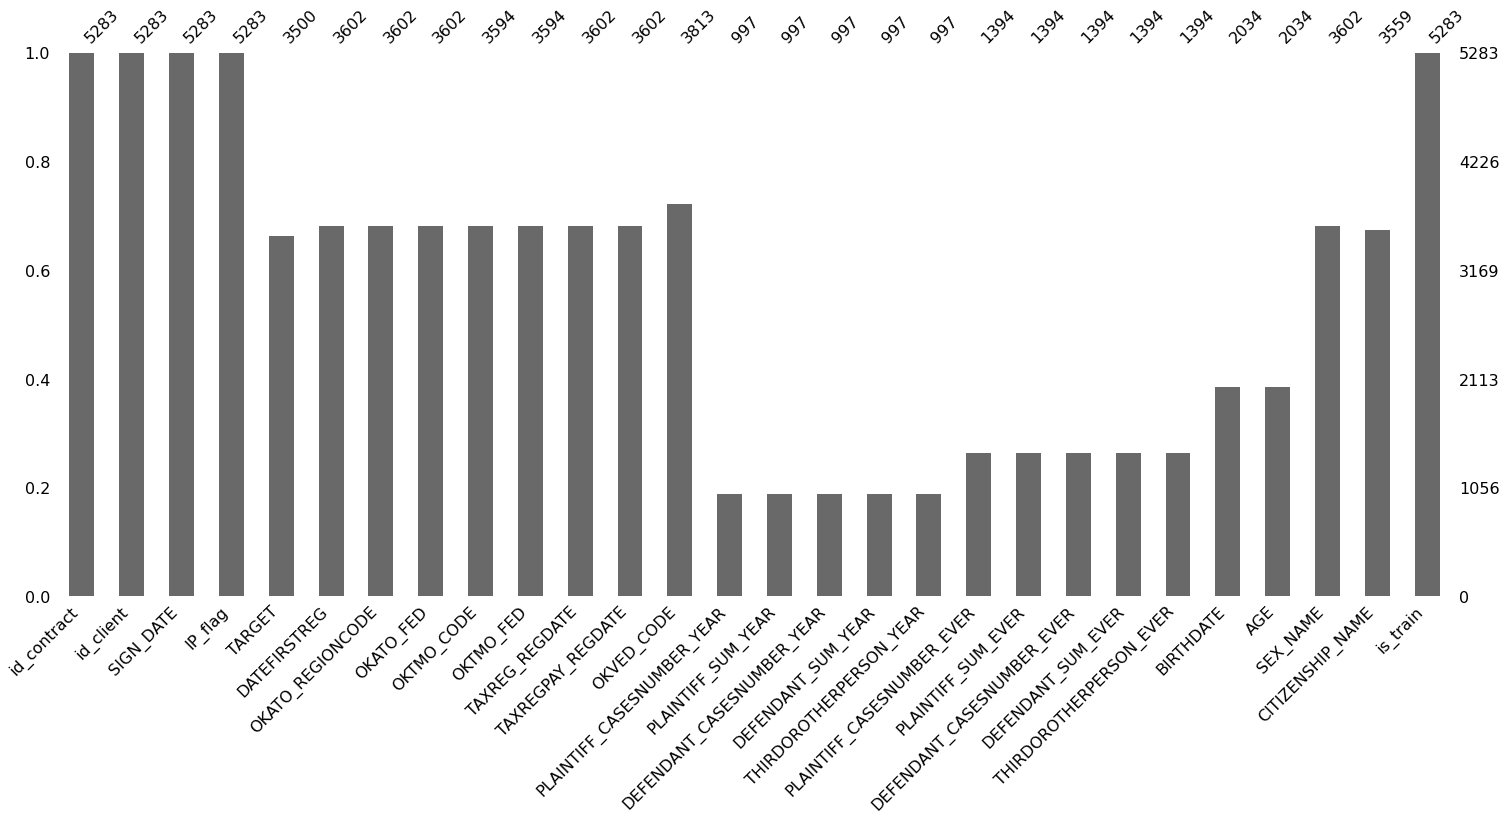

In [34]:
ip_columns_count = ip_data.count()
ip_columns = ip_columns_count[ip_columns_count>0].index.values

ip_data = ip_data[ip_columns]

msno.bar(ip_data)

## Генерация фичей

In [ ]:
# Число ранее выданных гарантий

In [36]:
ip_data

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,DATEFIRSTREG,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,TAXREG_REGDATE,TAXREGPAY_REGDATE,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,is_train
1,2,4650,2018-01-01,1,0.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1
4,5,9988,2018-01-01,1,0.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1
6,7,10714,2018-01-01,1,0.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1
15,16,5567,2018-01-01,1,1.0,2010-08-12,46.0,30.0,4.675000e+10,30.0,2010-08-12,2010-08-12,46.17,0.0,0.0,1.0,273411.0,0.0,7.0,11659738.0,2.0,1170362.0,0.0,1985-05-27,33.0,мужской,Российская Федерация,1
17,18,10092,2018-01-01,1,0.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7292,25184,10092,2019-12-25,1,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
7293,25185,1770,2019-12-26,1,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT,46.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
7300,25192,9002,2019-12-26,1,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
7310,25202,11644,2019-12-27,1,NaN,2004-12-28,40.0,31.0,4.037700e+10,31.0,2004-12-28,2006-05-02,46.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-20,48.0,мужской,Российская Федерация,0


# ЮЛ

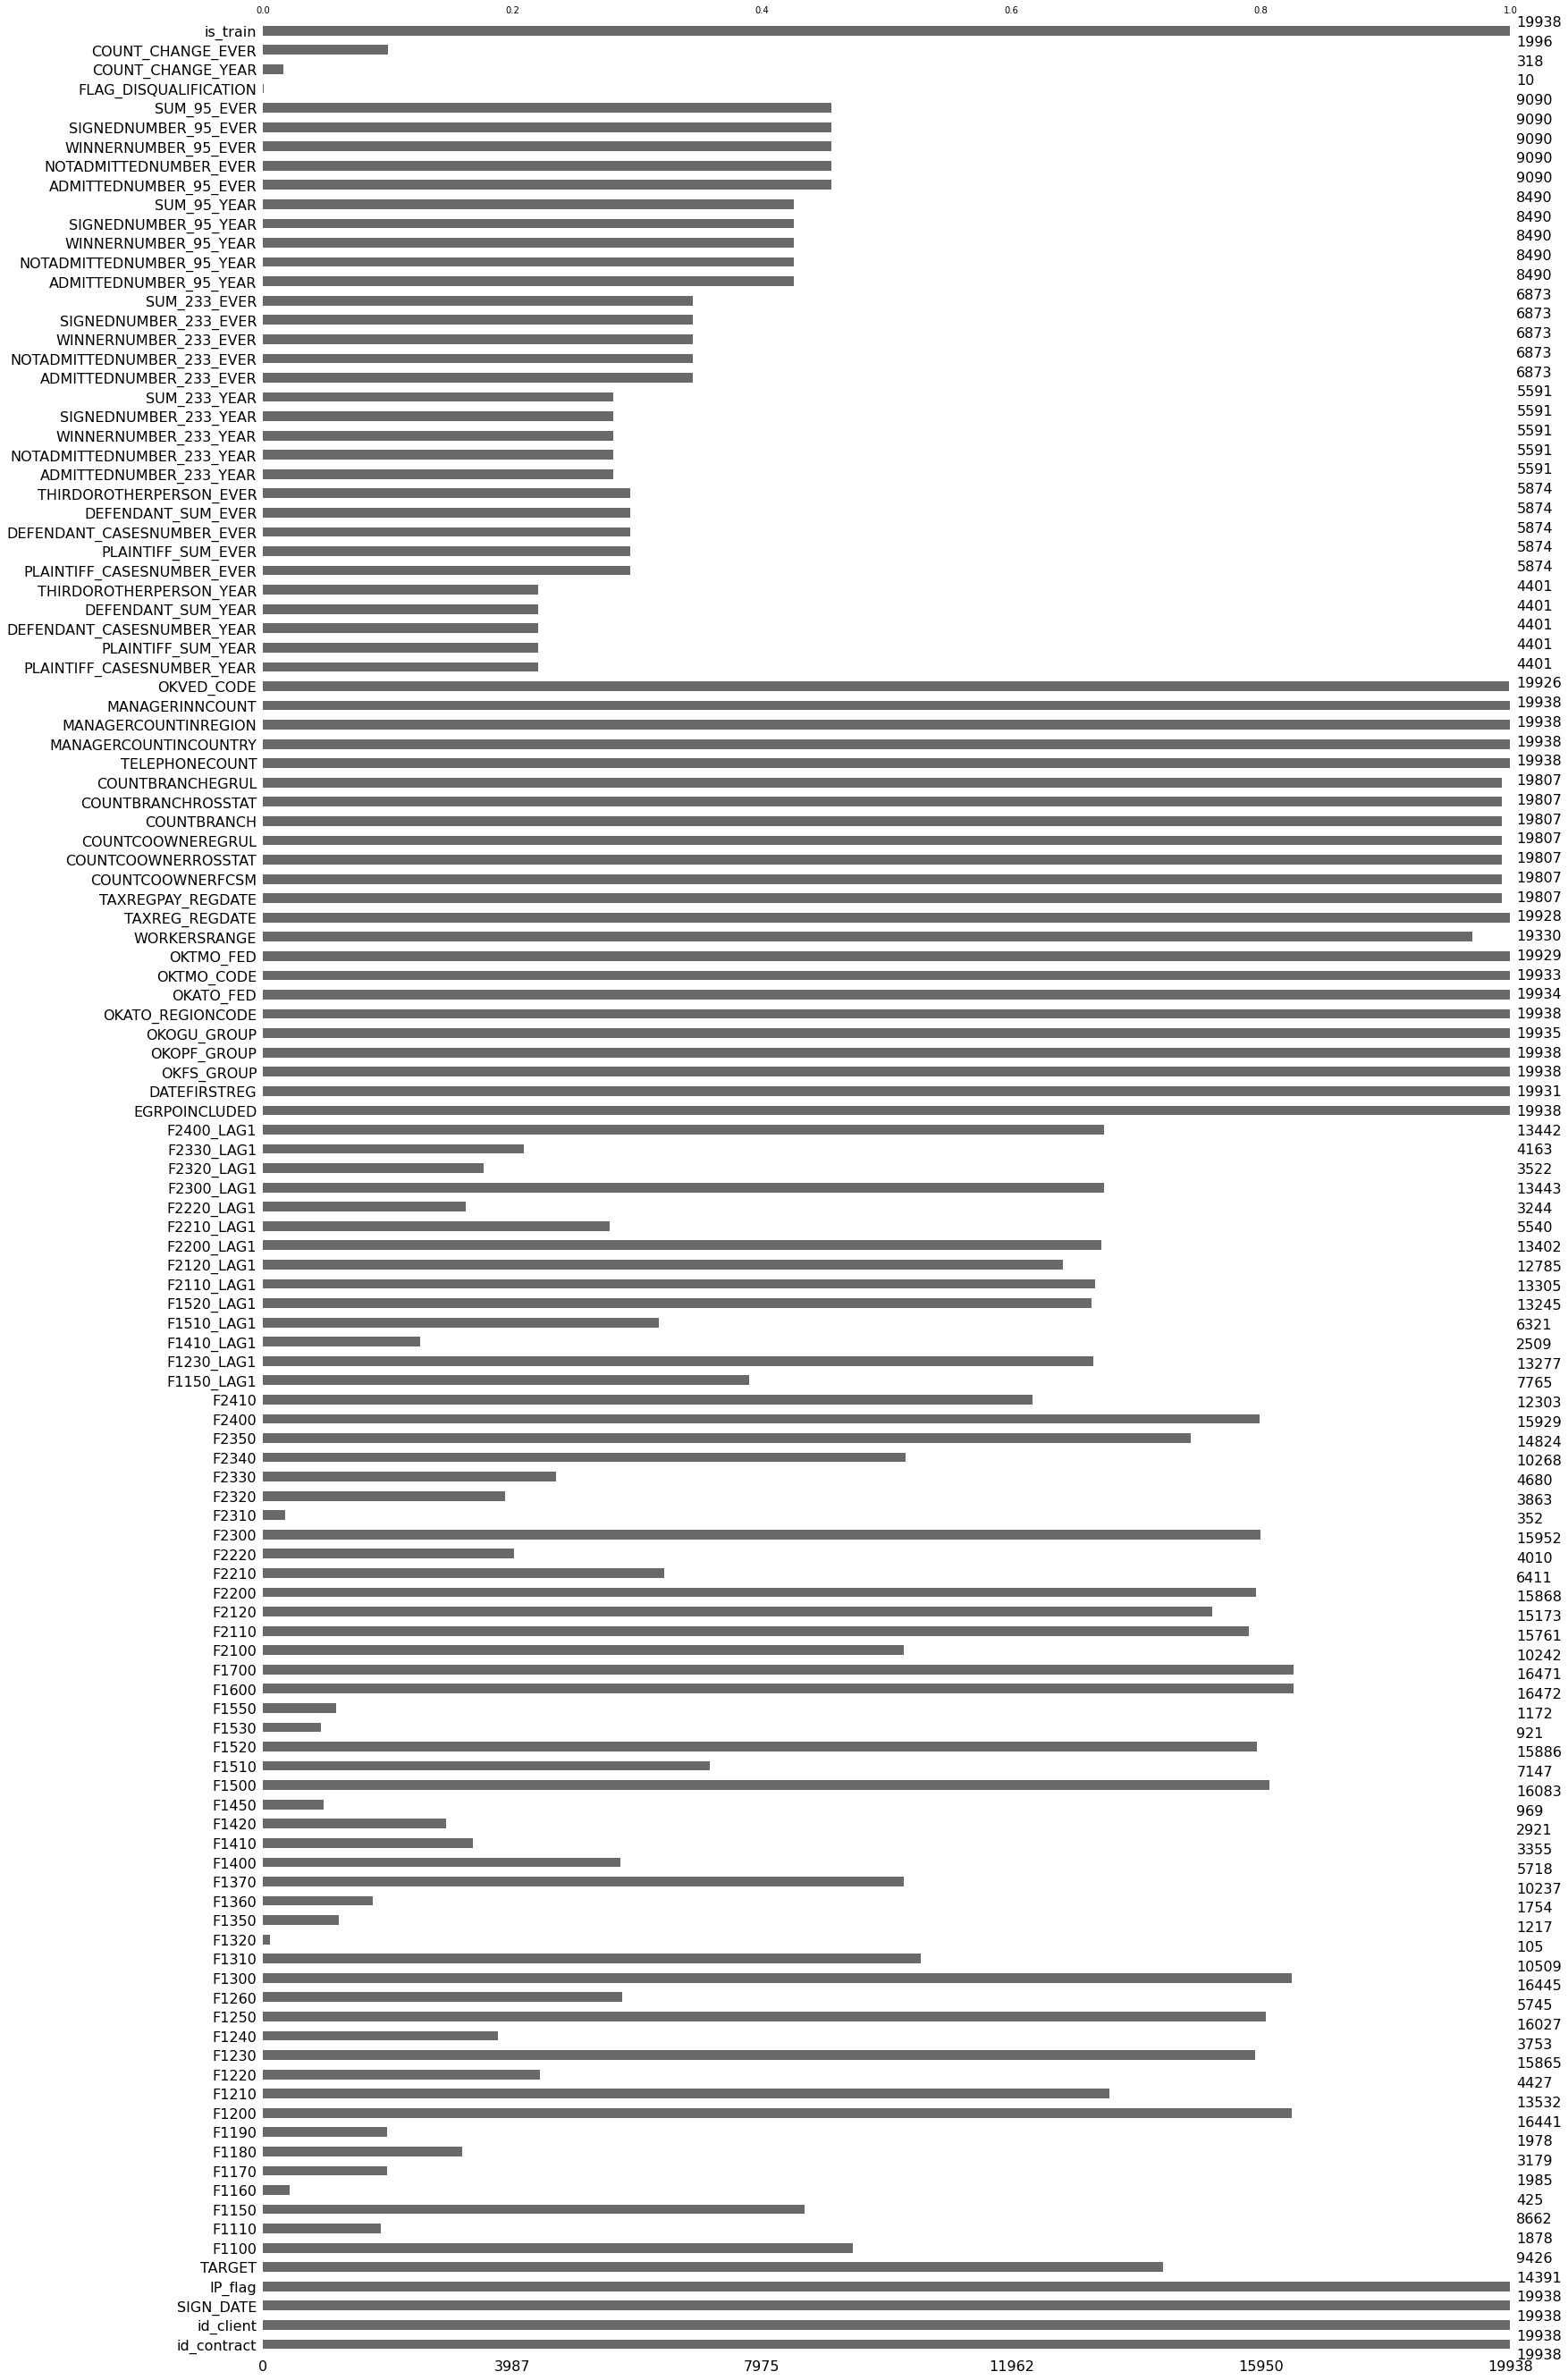

In [35]:
ul_columns_count = ul_data.count()
ul_columns = ul_columns_count[ul_columns_count>0].index.values

ul_data = ul_data[ul_columns]

msno.bar(ul_data)